# Reading the market data of BAJAJFINSV stock and preparing a training dataset and validation dataset.

In [37]:
import pandas as pd
import matplotlib.pyplot as plt

In [38]:
df = pd.read_csv('BAJFINANCE.csv')

In [39]:
df.set_index('Date', inplace=True)

<Axes: xlabel='Date'>

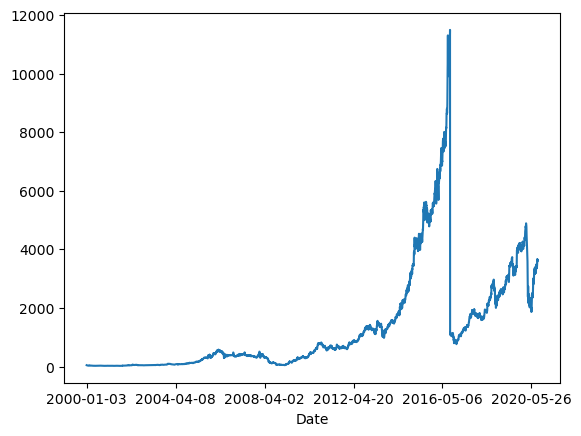

In [40]:
df['VWAP'].plot()

In [41]:
df.isnull().sum()

Symbol                   0
Series                   0
Prev Close               0
Open                     0
High                     0
Low                      0
Last                     0
Close                    0
VWAP                     0
Volume                   0
Turnover                 0
Trades                2779
Deliverable Volume     446
%Deliverble            446
dtype: int64

In [42]:
df.dropna(inplace=True)

In [43]:
df.isnull().sum()

Symbol                0
Series                0
Prev Close            0
Open                  0
High                  0
Low                   0
Last                  0
Close                 0
VWAP                  0
Volume                0
Turnover              0
Trades                0
Deliverable Volume    0
%Deliverble           0
dtype: int64

In [44]:
data = df.copy()

In [45]:
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
Date,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,4.322621e+11,1416.0,3427.0,0.4971
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,1.761205e+11,432.0,1718.0,0.6204
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,3.214631e+12,135.0,50912.0,0.9900
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,3.354910e+11,268.0,4312.0,0.7918
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,3.700840e+11,273.0,4073.0,0.6799
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,3.526895e+15,339815.0,1498309.0,0.1520
2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,2.444958e+15,213994.0,944373.0,0.1417
2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,1.674361e+15,162374.0,387513.0,0.0840


In [46]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

In [47]:
col = ['High', 'Low','Volume','Turnover', 'Trades']
for i in col:
    data[i+'_rolling_mean_3'] = data[i].rolling(window=3).mean()
    data[i+'_rolling_mean_7'] = data[i].rolling(window=7).mean()
    data[i+'_rolling_std_3'] = data[i].rolling(window=3).std()
    data[i+'_rolling_std_7'] = data[i].rolling(window=7).std()

In [48]:
data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Volume_rolling_std_3,Volume_rolling_std_7,Turnover_rolling_mean_3,Turnover_rolling_mean_7,Turnover_rolling_std_3,Turnover_rolling_std_7,Trades_rolling_mean_3,Trades_rolling_mean_7,Trades_rolling_std_3,Trades_rolling_std_7
Date,,,,,,,,,,,,,,,,,,,,,
2011-06-01,BAJFINANCE,EQ,616.70,617.00,636.50,616.00,627.00,631.85,627.01,6894,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-02,BAJFINANCE,EQ,631.85,625.00,638.90,620.00,634.00,633.45,636.04,2769,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2011-06-03,BAJFINANCE,EQ,633.45,625.15,637.80,620.00,623.00,625.00,625.09,51427,...,2.698087e+04,NaN,1.274338e+12,NaN,1.685217e+12,NaN,661.000000,NaN,670.500559,NaN
2011-06-06,BAJFINANCE,EQ,625.00,620.00,641.00,611.35,611.35,614.00,616.03,5446,...,2.735270e+04,NaN,1.242081e+12,NaN,1.710136e+12,NaN,278.333333,NaN,148.769396,NaN
2011-06-07,BAJFINANCE,EQ,614.00,604.00,623.95,604.00,619.90,619.15,617.73,5991,...,2.639122e+04,NaN,1.306735e+12,NaN,1.652377e+12,NaN,225.333333,NaN,78.270897,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,...,3.613401e+06,2.348888e+06,2.192348e+15,1.776493e+15,1.315344e+15,8.608028e+14,212607.666667,173809.285714,125273.490429,81831.863468
2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,...,1.987080e+06,2.403611e+06,2.708305e+15,1.901918e+15,7.237865e+14,8.886997e+14,254151.666667,181048.285714,74234.798338,82982.637290
2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,...,2.641848e+06,2.408580e+06,2.548738e+15,1.912267e+15,9.306171e+14,8.850381e+14,238727.666667,182218.571429,91269.616085,82597.470913


In [49]:
data.isnull().sum()

Symbol                     0
Series                     0
Prev Close                 0
Open                       0
High                       0
Low                        0
Last                       0
Close                      0
VWAP                       0
Volume                     0
Turnover                   0
Trades                     0
Deliverable Volume         0
%Deliverble                0
High_rolling_mean_3        2
High_rolling_mean_7        6
High_rolling_std_3         2
High_rolling_std_7         6
Low_rolling_mean_3         2
Low_rolling_mean_7         6
Low_rolling_std_3          2
Low_rolling_std_7          6
Volume_rolling_mean_3      2
Volume_rolling_mean_7      6
Volume_rolling_std_3       2
Volume_rolling_std_7       6
Turnover_rolling_mean_3    2
Turnover_rolling_mean_7    6
Turnover_rolling_std_3     2
Turnover_rolling_std_7     6
Trades_rolling_mean_3      2
Trades_rolling_mean_7      6
Trades_rolling_std_3       2
Trades_rolling_std_7       6
dtype: int64

In [59]:
data.dropna(inplace=True)

In [60]:
data.columns

Index(['Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'High_rolling_mean_3', 'High_rolling_mean_7',
       'High_rolling_std_3', 'High_rolling_std_7', 'Low_rolling_mean_3',
       'Low_rolling_mean_7', 'Low_rolling_std_3', 'Low_rolling_std_7',
       'Volume_rolling_mean_3', 'Volume_rolling_mean_7',
       'Volume_rolling_std_3', 'Volume_rolling_std_7',
       'Turnover_rolling_mean_3', 'Turnover_rolling_mean_7',
       'Turnover_rolling_std_3', 'Turnover_rolling_std_7',
       'Trades_rolling_mean_3', 'Trades_rolling_mean_7',
       'Trades_rolling_std_3', 'Trades_rolling_std_7'],
      dtype='object')

In [61]:
col = ['High_rolling_mean_7',
       'High_rolling_std_3', 'High_rolling_std_7', 'Low_rolling_mean_3',
       'Low_rolling_mean_7', 'Low_rolling_std_3', 'Low_rolling_std_7',
       'Volume_rolling_mean_3', 'Volume_rolling_mean_7',
       'Volume_rolling_std_3', 'Volume_rolling_std_7',
       'Turnover_rolling_mean_3', 'Turnover_rolling_mean_7',
       'Turnover_rolling_std_3', 'Turnover_rolling_std_7',
       'Trades_rolling_mean_3', 'Trades_rolling_mean_7',
       'Trades_rolling_std_3', 'Trades_rolling_std_7']

In [62]:
train_data = data[:1800]
test_data = data[1800:]

In [63]:
train_data[col]

,High_rolling_mean_7,High_rolling_std_3,High_rolling_std_7,Low_rolling_mean_3,Low_rolling_mean_7,Low_rolling_std_3,Low_rolling_std_7,Volume_rolling_mean_3,Volume_rolling_mean_7,Volume_rolling_std_3,Volume_rolling_std_7,Turnover_rolling_mean_3,Turnover_rolling_mean_7,Turnover_rolling_std_3,Turnover_rolling_std_7,Trades_rolling_mean_3,Trades_rolling_mean_7,Trades_rolling_std_3,Trades_rolling_std_7
Date,,,,,,,,,,,,,,,,,,,
2011-06-09,638.592857,12.769789,7.494911,612.666667,615.050000,15.011107,9.410145,2.136867e+04,1.866314e+04,13497.047986,18373.894011,1.356553e+12,1.175452e+12,8.665128e+11,1.155773e+12,682.666667,614.142857,354.841279,463.942320
2011-06-10,640.271429,1.639360,8.227994,617.516667,615.414286,13.030765,9.501961,2.966667e+04,2.209043e+04,2434.970705,18047.331029,1.886054e+12,1.393498e+12,1.579562e+11,1.136003e+12,1045.000000,606.142857,272.875429,448.020620
2011-06-13,638.692857,11.434196,9.497080,621.516667,614.842857,7.456597,9.298317,2.203933e+04,2.226357e+04,15640.051929,17835.642665,1.400430e+12,1.403765e+12,9.982094e+11,1.123423e+12,834.666667,580.142857,557.373603,464.778596
2011-06-14,637.428571,11.473593,10.198891,618.166667,614.835714,2.002707,9.293713,1.348767e+04,1.571643e+04,15088.183102,13139.472184,8.521943e+11,9.945331e+11,9.595224e+11,8.397765e+11,602.666667,589.142857,656.385050,455.234163
2011-06-15,634.857143,3.165833,11.352292,611.350000,612.942857,11.643560,11.262712,7.389333e+03,1.673700e+04,4575.812970,12469.137006,4.540265e+11,1.055761e+12,2.733211e+11,7.983186e+11,309.666667,619.571429,150.639747,436.941971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-09-04,2934.485714,88.954937,79.489416,2746.633333,2848.814286,83.341306,107.041856,2.160346e+06,1.649480e+06,696998.737787,642979.884199,6.015502e+14,4.715141e+14,1.827289e+14,1.673270e+14,106854.666667,87658.142857,2794.744413,21708.856675
2018-09-05,2906.742857,63.129081,100.594924,2688.933333,2812.092857,24.113551,119.854378,2.284096e+06,1.756973e+06,483305.554092,570427.041296,6.276342e+14,4.974827e+14,1.375623e+14,1.467744e+14,95882.333333,90342.000000,21770.352164,17267.163548
2018-09-06,2870.957143,23.818183,113.135709,2674.300000,2775.750000,8.146779,118.187686,1.827775e+06,1.744707e+06,734609.476628,584307.816124,4.963438e+14,4.897104e+14,2.020435e+14,1.561692e+14,75136.333333,84844.571429,30923.312263,24013.596897


In [27]:
!pip install pmdarima

  Obtaining dependency information for pmdarima from https://files.pythonhosted.org/packages/ac/f8/6c9364602b13f0dba129b53acd1344859690911a4d5021560d9fd6aa087f/pmdarima-2.0.4-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for Cython!=0.29.18,!=0.29.31,>=0.29 from https://files.pythonhosted.org/packages/85/7d/58635941dfbb5b4e197adb88080b9cbfb230dc3b75683698a530a1989bdb/Cython-3.0.8-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/614.7 kB ? eta -:--:--
    --------------------------------------- 10.2/614.7 kB ? eta -:--:--
   ----- ---------------------------------- 92.2/614.7 kB 1.3 MB/s eta 0:00:01
   ------------------------- -------------- 389.1/614.7 kB 3.4 MB/s eta 0:00:01
   ------------------------------------- -- 573.4/614.7 kB 3.6 MB/s eta 0:00:01
   ---------------------------------------- 614.7/614.7 kB 3.5 MB/s eta 0:00:00
   ---------------------------------------- 0.0/2.8 MB ? eta -:--:--
   -- ---------------------

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tables 3.8.0 requires blosc2~=2.0.0, which is not installed.


In [116]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
from pmdarima import auto_arima

In [138]:
model=auto_arima(y=train_data['VWAP'],X=train_data[col],trace=True)

Performing stepwise search to minimize aic
 ARIMA(2,0,2)(0,0,0)[0] intercept   : AIC=21109.851, Time=1.72 sec
 ARIMA(0,0,0)(0,0,0)[0] intercept   : AIC=21115.331, Time=1.10 sec
 ARIMA(1,0,0)(0,0,0)[0] intercept   : AIC=21110.082, Time=1.15 sec
 ARIMA(0,0,1)(0,0,0)[0] intercept   : AIC=21110.556, Time=1.42 sec
 ARIMA(0,0,0)(0,0,0)[0]             : AIC=32806.765, Time=1.04 sec
 ARIMA(1,0,2)(0,0,0)[0] intercept   : AIC=21110.802, Time=1.66 sec
 ARIMA(2,0,1)(0,0,0)[0] intercept   : AIC=21121.350, Time=1.54 sec
 ARIMA(3,0,2)(0,0,0)[0] intercept   : AIC=21113.292, Time=1.80 sec
 ARIMA(2,0,3)(0,0,0)[0] intercept   : AIC=21672.191, Time=1.88 sec
 ARIMA(1,0,1)(0,0,0)[0] intercept   : AIC=21111.559, Time=1.48 sec
 ARIMA(1,0,3)(0,0,0)[0] intercept   : AIC=21115.857, Time=1.81 sec
 ARIMA(3,0,1)(0,0,0)[0] intercept   : AIC=21111.373, Time=1.72 sec
 ARIMA(3,0,3)(0,0,0)[0] intercept   : AIC=21127.337, Time=1.94 sec
 ARIMA(2,0,2)(0,0,0)[0]             : AIC=21108.193, Time=1.64 sec
 ARIMA(1,0,2)(0,0,0

In [129]:
model.fit(train_data['VWAP'], train_data[col])

ARIMA(order=(1, 0, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [130]:
forecast = model.predict(n_periods=len(test_data), X=test_data[col])

In [134]:
test_data['forecast'] = forecast.values

In [135]:
test_data

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,Volume_rolling_std_7,Turnover_rolling_mean_3,Turnover_rolling_mean_7,Turnover_rolling_std_3,Turnover_rolling_std_7,Trades_rolling_mean_3,Trades_rolling_mean_7,Trades_rolling_std_3,Trades_rolling_std_7,forecast
Date,,,,,,,,,,,,,,,,,,,,,
2018-09-11,BAJFINANCE,EQ,2615.65,2621.00,2668.80,2562.25,2600.00,2600.75,2619.05,3357660,...,8.164109e+05,5.465978e+14,5.474503e+14,2.905375e+14,2.170264e+14,89504.000000,86114.285714,40756.099335,32012.681782,2608.937130
2018-09-12,BAJFINANCE,EQ,2600.75,2617.95,2636.95,2516.10,2588.90,2594.00,2577.54,2682340,...,8.351259e+05,6.625717e+14,5.457439e+14,2.325644e+14,2.156391e+14,112805.333333,88611.142857,31297.267202,34656.587966,2662.375877
2018-09-14,BAJFINANCE,EQ,2594.00,2630.50,2683.50,2626.25,2678.00,2672.20,2651.42,1795131,...,8.007301e+05,6.822451e+14,5.122064e+14,2.018671e+14,2.036245e+14,112704.000000,84138.714286,31471.093038,33742.606344,2668.736900
2018-09-17,BAJFINANCE,EQ,2672.20,2660.00,2660.00,2588.25,2596.00,2604.60,2613.75,1455320,...,8.189293e+05,5.159104e+14,4.995687e+14,1.593010e+14,2.094265e+14,87183.333333,82386.142857,35128.684296,34854.254176,2569.437062
2018-09-18,BAJFINANCE,EQ,2604.60,2610.00,2627.45,2559.00,2563.40,2570.40,2597.61,1449290,...,7.800295e+05,4.109393e+14,5.091420e+14,5.634743e+13,2.006348e+14,64967.666667,84253.142857,10189.437390,32916.577887,2553.632409
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-08-25,BAJFINANCE,EQ,3492.05,3525.00,3660.00,3510.00,3658.00,3642.90,3579.12,9854070,...,2.348888e+06,2.192348e+15,1.776493e+15,1.315344e+15,8.608028e+14,212607.666667,173809.285714,125273.490429,81831.863468,3556.351410
2020-08-26,BAJFINANCE,EQ,3642.90,3665.00,3707.00,3631.00,3638.20,3645.55,3668.17,6665336,...,2.403611e+06,2.708305e+15,1.901918e+15,7.237865e+14,8.886997e+14,254151.666667,181048.285714,74234.798338,82982.637290,3994.560316
2020-08-27,BAJFINANCE,EQ,3645.55,3656.95,3668.40,3596.40,3636.00,3632.50,3631.13,4611132,...,2.408580e+06,2.548738e+15,1.912267e+15,9.306171e+14,8.850381e+14,238727.666667,182218.571429,91269.616085,82597.470913,3932.958210


<Axes: xlabel='Date'>

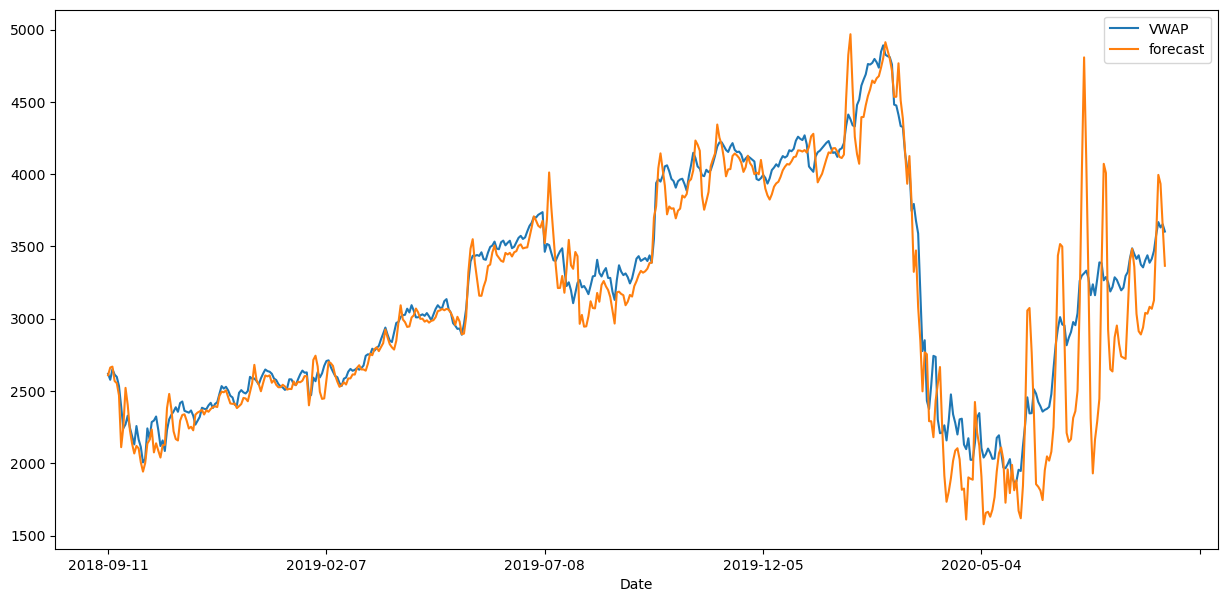

In [136]:
test_data[['VWAP','forecast']].plot(figsize=(15,7))

In [139]:
from sklearn.metrics import r2_score, mean_squared_error
print(np.sqrt(mean_squared_error(test_data['VWAP'], forecast)))
r2_score(test_data['VWAP'], test_data['forecast'])

253.45770352581488


0.8813992518408328